In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../base_dados/beber_copia.csv', low_memory=False)


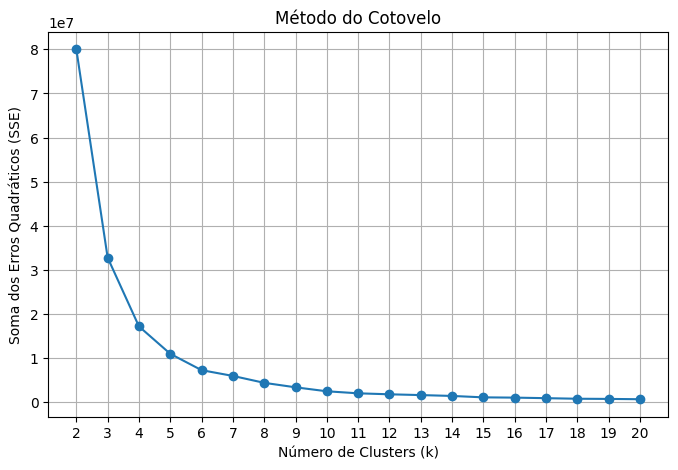

In [4]:

data = df[['waistline']].dropna()  # Remover valores ausentes

sse = []

# Intervalo de clusters de 2 a 20
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do Método do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos Erros Quadráticos (SSE)')
plt.title('Método do Cotovelo')
plt.xticks(range(2, 21))
plt.grid()
plt.show()

Centroides dos clusters:
Cluster 0: [87.54117164]
Cluster 1: [73.27597214]
Cluster 2: [999.]
Cluster 3: [97.7103326]
Cluster 4: [65.56302615]
Cluster 5: [80.18727262]


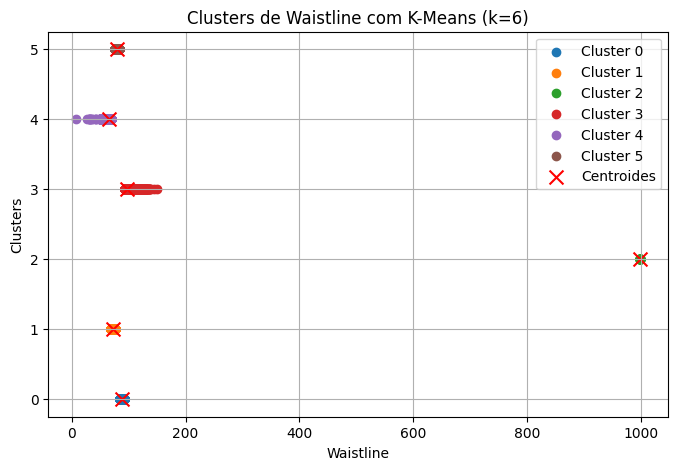

In [5]:
kmeans = KMeans(n_clusters=6, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Adicionar os clusters ao DataFrame original
df['Cluster'] = data['Cluster']

# Exibir o centroide dos clusters
centroides = kmeans.cluster_centers_
print("Centroides dos clusters:")
for i, centroide in enumerate(centroides):
    print(f"Cluster {i}: {centroide}")

plt.figure(figsize=(8, 5))
for cluster in range(6):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['waistline'], [cluster] * len(cluster_data), label=f'Cluster {cluster}')

# Exibir os centroides no gráfico
plt.scatter(centroides, range(6), color='red', marker='x', s=100, label='Centroides')
plt.xlabel('Waistline')
plt.ylabel('Clusters')
plt.title('Clusters de Waistline com K-Means (k=6)')
plt.legend()
plt.grid()
plt.show()